In [857]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal  import argrelextrema

In [858]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")
df = df.drop(["unix", "Volume BTC", "Volume USDT", "tradecount"], axis = 1)
# convert to datetime
df['date'] = pd.to_datetime(df['date'])
# set the index
df.set_index('date', inplace=True)
df = df[::-1]
df

,symbol,open,high,low,close
date,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
...,...,...,...,...,...
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02


In [859]:
df["close"][[False * len(df["close"])]]

date
2017-08-17    4285.08
Name: close, dtype: float64

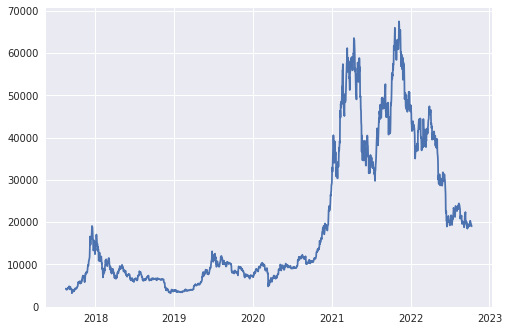

In [860]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])

In [861]:
pivot_range = int(20)

conditions1_minima = np.array([(df["close"].shift(periods = pivot_range) < df["close"].shift(periods = pivot_range + lb)) for lb in range(1, 11)])
conditions2_minima = np.array([(df["close"].shift(periods = pivot_range) < df["close"].shift(periods = pivot_range - lb)) for lb in range(1, 11)])
conditions_minima = conditions1_minima & conditions2_minima
# 1st element is if condition is true compared to first candle before,
# 2nd element is if condition is true compared to second candle before and so on ...

conditions_minima_T = np.transpose(conditions_minima)
# First element checks if 10 forward and 10 backward minimum conditions are true for 1st row, 
# Second element checks if 10 forward and 10 backward minimum conditions are true for 2nd row and so on ...

check_minima = np.all(conditions_minima_T, axis = 1)
# Test whether all array elements along a given axis evaluate to True.

df["check_minima"] = check_minima
df["check_minima"][df["check_minima"] == False] = None
df["minima"] = df["close"].shift(periods = pivot_range)[check_minima == True]

/tmp/ipykernel_384/2286082114.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check_minima"][df["check_minima"] == False] = None


In [862]:
conditions1_maxima = np.array([(df["close"].shift(periods = pivot_range) > df["close"].shift(periods = pivot_range + lb)) for lb in range(1, 11)])
conditions2_maxima = np.array([(df["close"].shift(periods = pivot_range) > df["close"].shift(periods = pivot_range - lb)) for lb in range(1, 11)])
conditions_maxima = conditions1_maxima & conditions2_maxima

# 1st element is if condition is true compared to first candle before,
# 2nd element is if condition is true compared to second candle before and so on ...

conditions_maxima_T = np.transpose(conditions_maxima)

# First element checks if 10 forward and 10 backward maximum conditions are true for 1st row, 
# Second element checks if 10 forward and 10 backward maximum conditions are true for 2nd row and so on ...

check_maxima = np.all(conditions_maxima_T, axis = 1)
# Test whether all array elements along a given axis evaluate to True.

df["check_maxima"] = check_maxima
df["check_maxima"][df["check_maxima"] == False] = None
df["maxima"] = df["close"].shift(periods = pivot_range)[check_maxima == True]

maxima = list(enumerate(df["maxima"]))

print(maxima[50:100])

[(50, nan), (51, nan), (52, nan), (53, nan), (54, nan), (55, nan), (56, nan), (57, nan), (58, nan), (59, nan), (60, nan), (61, nan), (62, nan), (63, nan), (64, nan), (65, nan), (66, nan), (67, nan), (68, nan), (69, nan), (70, nan), (71, nan), (72, nan), (73, nan), (74, nan), (75, nan), (76, nan), (77, nan), (78, nan), (79, nan), (80, nan), (81, nan), (82, nan), (83, nan), (84, nan), (85, nan), (86, nan), (87, nan), (88, nan), (89, nan), (90, nan), (91, nan), (92, nan), (93, nan), (94, nan), (95, nan), (96, nan), (97, nan), (98, nan), (99, 7357.09)]


/tmp/ipykernel_384/1395493273.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check_maxima"][df["check_maxima"] == False] = None


In [ ]:
df.head()

,symbol,open,high,low,close,check_minima,minima,check_maxima,maxima
date,,,,,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,NaN,NaN,NaN,NaN
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,NaN,NaN,NaN,NaN
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,NaN,NaN,NaN,NaN
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,NaN,NaN,NaN,NaN
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,NaN,NaN,NaN,NaN


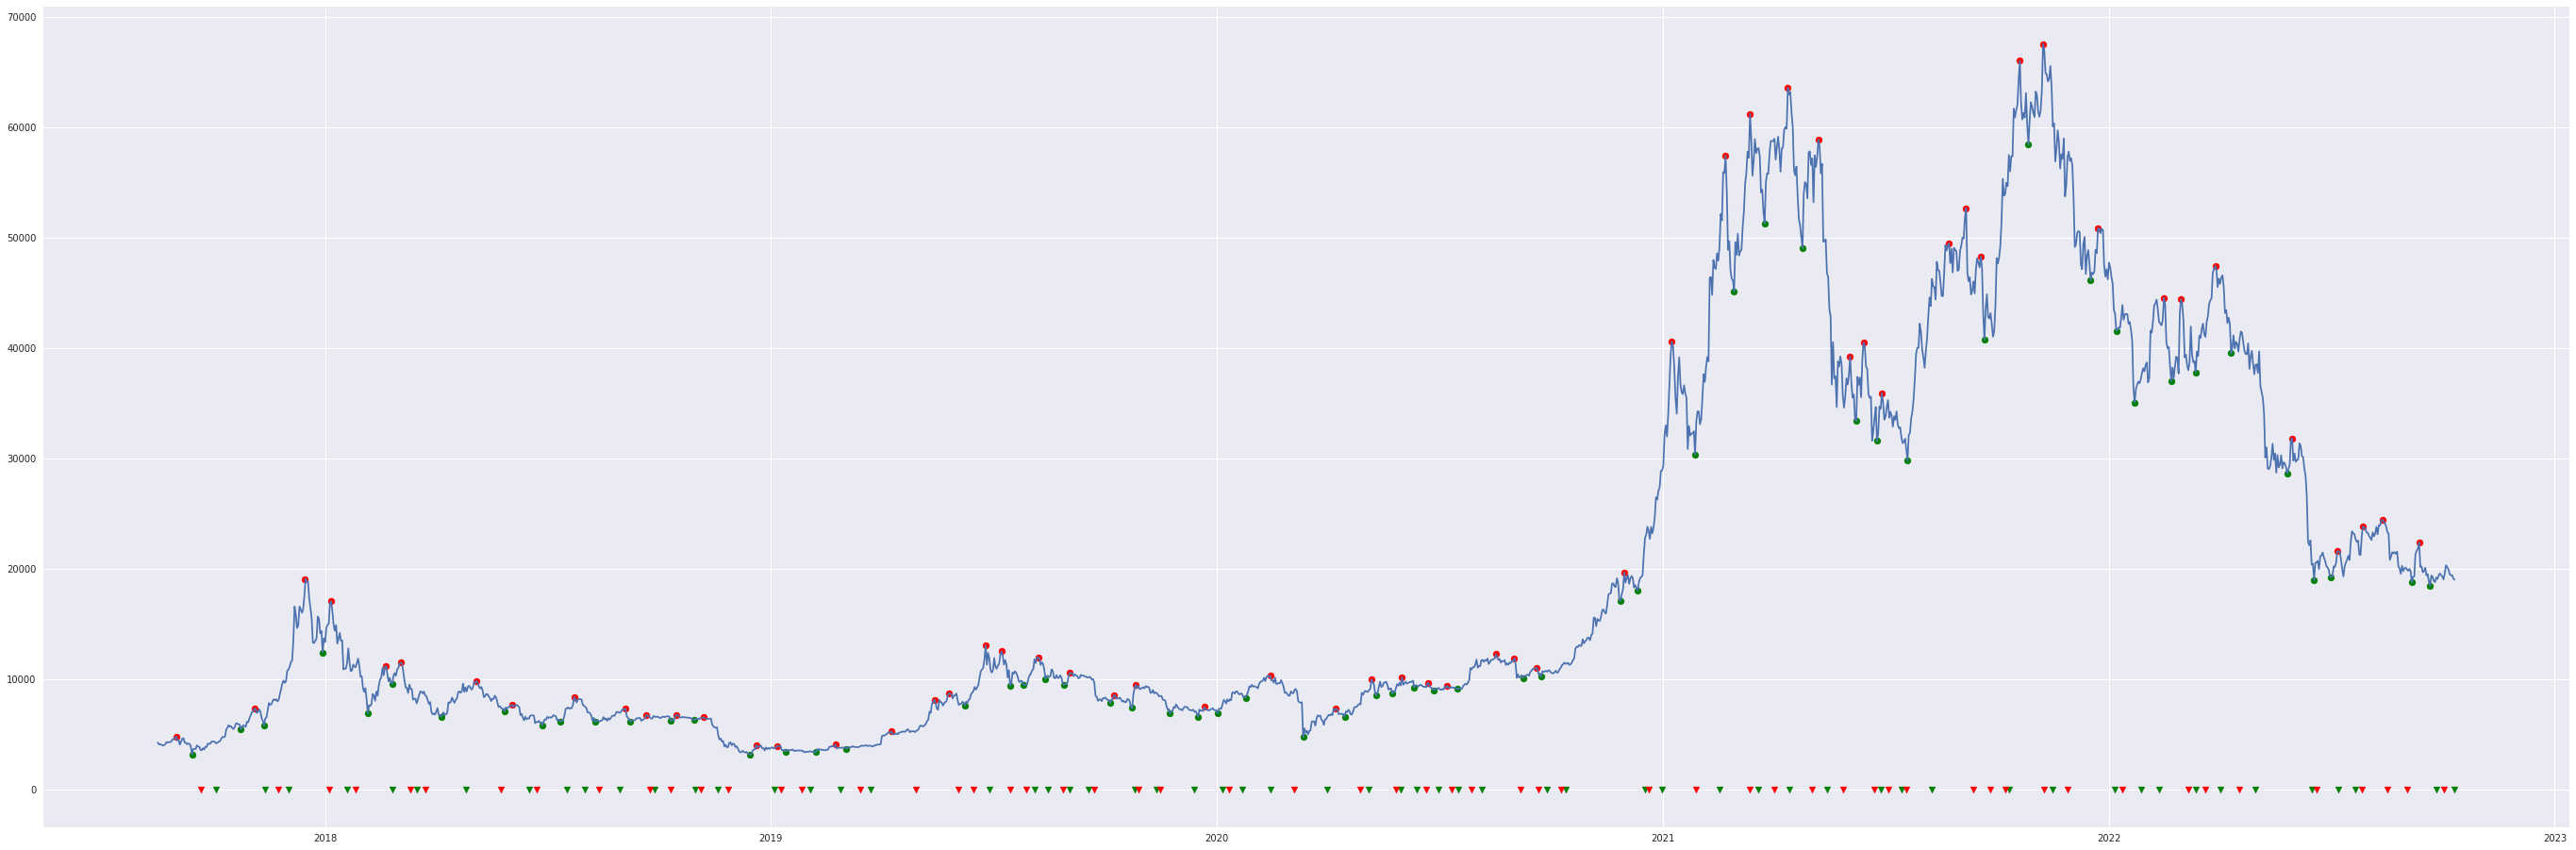

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize = [48, 16])
plt.plot(df.index, df["close"])
plt.scatter(df.index, df["check_minima"], c = "g", marker = "v")
plt.scatter(df.index, df["check_maxima"], c = "r", marker = "v")
plt.scatter(df.index.shift(periods = -pivot_range, freq = "D"), df["minima"], c = "g", marker = "o")
plt.scatter(df.index.shift(periods = -pivot_range, freq = "D"), df["maxima"], c = "r", marker = "o")